## SENTIMENT ANALYSIS

- Sentiment analysis aims to identify and extract subjective information from text, such as opinions, emotions, and attitudes

**Importing necessary library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Loat Dataset

In [2]:
df = pd.read_csv('IMDB_Dataset.csv')
data = df.copy()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.shape

(50000, 2)

In [7]:
duplicate = df.duplicated().sum()
duplicate

418

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.shape

(49582, 2)

In [11]:
df.tail()

,review,sentiment
49577,I thought this movie did a down right good job...,positive
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,I am a Catholic taught in parochial elementary...,negative
49580,I'm going to have to disagree with the previou...,negative
49581,No one expects the Star Trek movies to be high...,negative


### Data preprocessing

- Remove Html tags
- Remove URL tags
- Remove Puncuation(.,?') from text
- remove alphanumeric
- lower all text

In [12]:
# importing RegeX(Regular expression) for cleaning text
import re

In [13]:
def html_remover(html):
    html_tags = re.sub(r'<.*?>', '', html)
    return html_tags

features = ['review']
for i in features:
    df[i] = df[i].apply(html_remover)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**url remove**

In [14]:
def url_remover(sent):
    url_tag = re.sub(r'https?://\S+|www\.\S+|\b(?:[a-zA-Z-]+://?|www[.])[^\s()<>]+(?:\([\w\d]+\)|([^[:punct:]\s]|/))', '', sent)
    return url_tag

for i in features:
    df[i] = df[i].apply(url_remover)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##### Emoji removal

In [15]:
# import re

# def remove_emojis(text):
#     emoji_pattern = re.compile(
#         "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F700-\U0001F77F"  # alchemical symbols
#         u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
#         u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
#         u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#         u"\U0001FA00-\U0001FA6F"  # Chess Symbols
#         u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
#         u"\U00002702-\U000027B0"  # Dingbats
#         u"\U000024C2-\U0001F251" 
#         "]+",
#         flags=re.UNICODE,
#     )
#     return emoji_pattern.sub("", text)
# for i in features:
#     df[i] = df[i].apply(remove_emojis)

# df.head()


In [16]:
import emoji
import re

# Define the emoji removal function
def emoji_removal(sent):
    return emoji.demojize(sent)
for i in features:
    df[i] = df[i].apply(emoji_removal)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Remove letter with number (alphanumeric)**

In [17]:
def remove_alphanumeric(sent):
    cleaned_alphanum = re.sub(r'\w*\d\w*', '', sent)
    return cleaned_alphanum

for i in features:
    df[i] = df[i].apply(remove_alphanumeric)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Remove ppunctuations**

In [18]:
def punctuation(sent):
    remove_punctuation = re.sub(r'[^\w\s]', '', sent)
    return remove_punctuation

for col_name in features:
    df[col_name] = df[col_name].apply(punctuation)
    
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


**Lower words**

In [19]:
# import string
# df['review'] = df['review'].str.lower()

In [20]:
import string
def lower_case(df, col_names):
    for col in col_names:
        df[col] = df[col].str.lower()
    return df
df = lower_case(df, features)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


**contractions**

In [21]:
import contractions
def word_expand(word):
    word_expanded = contractions.fix(word)
    return word_expanded

for i in features:
    df[i] = df[i].apply(word_expand)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


### Tokenization

In [22]:
from nltk.tokenize import word_tokenize
def token_words(text):
    word = word_tokenize(text)
    return word

for columns in features:
    df[columns] = df[columns].apply(token_words)
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, is, a, family, where, a, li...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive


**Spelling Correction**

In [23]:
# from textblob import TextBlob
# def spelling_correction(text):
#     corrected_text = str(TextBlob(str(text)).correct())
#     return corrected_text
# for col in features:
#     df[col] = df[col].apply(spelling_correction)

**Stopwords**

- perform stopword except `not`

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))
discard_not = nltk_stopwords.discard('not')
print("Stopwords except --> not:")
print(", ".join(sorted(nltk_stopwords)))

Stopwords except --> not:
a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, whi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ak352\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from nltk.corpus import stopwords
word_stop = set(stopwords.words('english')) - {'not'}
def stop_word_removal(text):
    word_filter = [word for word in text if word.lower() not in word_stop]
    return ' '.join(word_filter)
df['review'] = df['review'].apply(stop_word_removal)

In [26]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


## Lemmatization

In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_nltk(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_tokens

df['review'] = df['review'].apply(lemmatize_nltk)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ak352\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive


In [28]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# def lemmatize(text):
#     doc = nlp(text)
#     lemmatized_text = [token.lemma_ for token in doc]
#     return lemmatized_text
# df['review'] = df['review'].apply(lemmatize)
# df.head()

### Feature selection

**POS tagging**

In [29]:
# def pos_tagging_spacy(text):
#     doc = nlp(text)
#     pos_tags = [(token.text, token.pos_) for token in doc]
#     return pos_tags 
# df['review'] = df['review'].apply(pos_tagging_spacy)
# df

**Numerical to categorical**

In [30]:
encoding = {'positive': 1, 'negative': 0}
df['sentiment'] = df['sentiment'].map(encoding)
df.head()

,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, think, ...",0
4,"[petter, matteis, love, time, money, visually,...",1


#### Train Test Split

In [31]:
ghfgh

NameError: name 'ghfgh' is not defined

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df['review']
y = df['sentiment']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Tokenization**

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [36]:
tokenize = Tokenizer()
tokenize.fit_on_texts(X_train)
len(tokenize.word_index)

175372

In [37]:
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)

**Padding**

In [38]:
max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 1128


In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=100, padding='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post')

In [40]:
X_train

array([[  15,  304,    2, ...,    0,    0,    0],
       [ 681,   33,    2, ...,    0,    0,    0],
       [4096, 1217,   63, ..., 2181,   18,    1],
       ...,
       [ 811,    2,   45, ...,   27,    2,   59],
       [ 226,   88,  535, ...,    0,    0,    0],
       [  65,  237, 1866, ...,    0,    0,    0]])

In [41]:
y_train

7827     0
4811     0
35252    1
3446     0
24377    0
        ..
11284    0
44732    0
38158    0
860      1
15795    1
Name: sentiment, Length: 39665, dtype: int64

**Word2Vec**

In [42]:
from gensim.models import Word2Vec
import numpy as np

In [43]:
embedding_model = Word2Vec(sentences=df['review'], vector_size=100, window=5, min_count=1, workers=4)

def apply_word_embeddings(text, model):
    embedded_text = []
    for word in text:
        if word in model.wv:
            embedded_text.append(model.wv[word])
        else:
            embedded_text.append(np.zeros(model.vector_size))  # Replace with appropriate handling
    return embedded_text

df['review'] = df['review'].apply(lambda x: apply_word_embeddings(x, embedding_model))

In [44]:
df.head()

,review,sentiment
0,"[[-0.6061527, 1.3260645, 0.14341994, 1.1909993...",1
1,"[[0.35742646, 0.44860604, -1.2554256, -0.39996...",1
2,"[[0.14108355, 0.61711764, -2.8919322, 0.258805...",1
3,"[[0.7164507, -0.28226125, 0.34122556, -0.20327...",0
4,"[[0.035983074, 0.0063526356, 0.019535817, -0.0...",1


### LSTM model

In [45]:
embedding_dim = 50
max_words = 175372
max_length = 100

In [46]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, LSTM, Dense, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

In [47]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_length))

model.add(LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.01)))  # First LSTM layer with dropout
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01)))  # First LSTM layer with dropout
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(units=16, return_sequences=True, kernel_regularizer=l2(0.01)))  # First LSTM layer with dropout
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(units=1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

In [50]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1240/1240 [==============================] - 62s 44ms/step - loss: 0.6042 - accuracy: 0.7753 - val_loss: 0.4604 - val_accuracy: 0.8059
Epoch 2/10
1240/1240 [==============================] - 54s 43ms/step - loss: 0.3383 - accuracy: 0.8684 - val_loss: 0.4575 - val_accuracy: 0.7976
Epoch 3/10
1240/1240 [==============================] - 53s 43ms/step - loss: 0.2526 - accuracy: 0.9069 - val_loss: 0.4754 - val_accuracy: 0.7948
Epoch 4/10
1240/1240 [==============================] - 54s 43ms/step - loss: 0.2024 - accuracy: 0.9267 - val_loss: 0.4818 - val_accuracy: 0.7913
Epoch 5/10
1240/1240 [==============================] - 53s 43ms/step - loss: 0.1681 - accuracy: 0.9400 - val_loss: 0.5798 - val_accuracy: 0.7827
Epoch 6/10
1240/1240 [==============================] - 53s 43ms/step - loss: 0.1458 - accuracy: 0.9478 - val_loss: 0.5411 - val_accuracy: 0.7775
Epoch 7/10
1240/1240 [==============================] - 53s 43ms/step - loss: 0.1313 - accuracy: 0.9531 - val_loss: 0.6240 -

In [51]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

310/310 [==============================] - 4s 14ms/step - loss: 0.7975 - accuracy: 0.7651
Test Loss: 0.7975
Test Accuracy: 0.7651


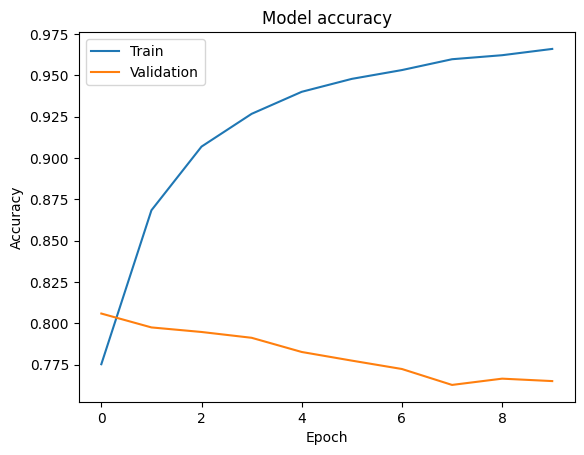

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

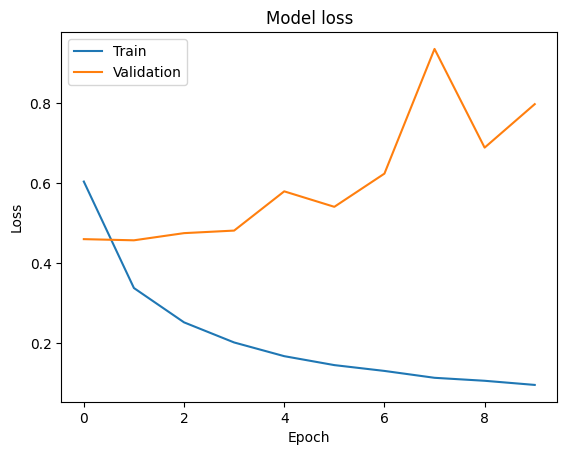

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### GRU model

In [54]:
from keras.layers import GRU, Dropout

In [55]:
max_words = 10000 
embedding_dim = 100

In [57]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, MaxPooling1D, GlobalMaxPooling1D, Dense

max_words = 10000  # Replace with your actual vocabulary size
embedding_dim = 100

models = Sequential()
models.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
models.add(GRU(120, return_sequences=True))
models.add(Dropout(0.3))
models.add(MaxPooling1D(pool_size=2))

models.add(GRU(64, return_sequences=True))
models.add(Dropout(0.3))
models.add(MaxPooling1D(pool_size=2))

models.add(GRU(64, return_sequences=True))
models.add(Dropout(0.3))
models.add(MaxPooling1D(pool_size=2))
models.add(GlobalMaxPooling1D())  # GlobalMaxPooling1D instead of MaxPooling1D

models.add(Dense(units=1, activation='sigmoid'))
models.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = models.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1240/1240 [==============================] - 47s 34ms/step - loss: 0.3617 - accuracy: 0.8357 - val_loss: 0.3228 - val_accuracy: 0.8695
Epoch 2/10
1240/1240 [==============================] - 41s 33ms/step - loss: 0.2471 - accuracy: 0.9012 - val_loss: 0.3209 - val_accuracy: 0.8684
Epoch 3/10
1240/1240 [==============================] - 42s 33ms/step - loss: 0.1952 - accuracy: 0.9258 - val_loss: 0.3221 - val_accuracy: 0.8617
Epoch 4/10
1240/1240 [==============================] - 42s 34ms/step - loss: 0.1466 - accuracy: 0.9462 - val_loss: 0.3313 - val_accuracy: 0.8595
Epoch 5/10
1240/1240 [==============================] - 41s 33ms/step - loss: 0.1012 - accuracy: 0.9652 - val_loss: 0.3874 - val_accuracy: 0.8513
Epoch 6/10
1240/1240 [==============================] - 41s 33ms/step - loss: 0.0686 - accuracy: 0.9772 - val_loss: 0.4494 - val_accuracy: 0.8456
Epoch 7/10
1240/1240 [==============================] - 41s 33ms/step - loss: 0.0488 - accuracy: 0.9836 - val_loss: 0.4782 -

In [58]:
# Evaluate the model
loss, accuracy = models.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

310/310 [==============================] - 4s 13ms/step - loss: 0.5964 - accuracy: 0.8440
Test Loss: 0.5964
Test Accuracy: 0.8440


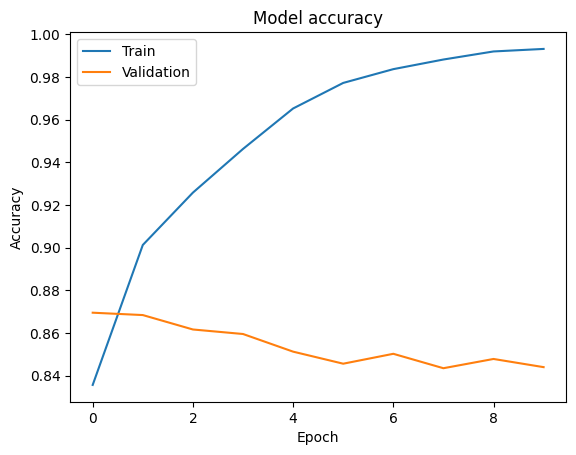

In [59]:
import matplotlib.pyplot as plt
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

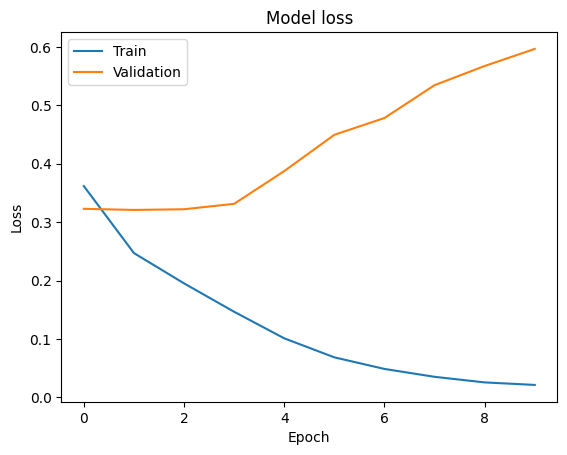

In [60]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Predction

In [64]:
from sklearn.metrics import accuracy_score

In [61]:
gru_pred = models.predict(X_test)

310/310 [==============================] - 4s 11ms/step


In [62]:
gru_pred = (gru_pred > 0.5).astype('int')

In [65]:
print("Accuracy Score is :",accuracy_score(gru_pred,y_test)*100,'%')

Accuracy Score is : 84.40052435212262 %


In [66]:
sentiment_labels = {0: 'negative', 1: 'positive'}

gru_sentiments = [[sentiment_labels[val[0]]] for val in gru_pred]
gru_sentiments[0:10]

[['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive']]

### BILstm

In [67]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPooling1D

model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=max_words, output_dim=100))
model_bilstm.add(Bidirectional(LSTM(120, return_sequences=True)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(GlobalMaxPooling1D())
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 240)        212160    
 l)                                                              
                                                                 
 dropout_9 (Dropout)         (None, None, 240)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        156160    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, None, 128)         0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)             

In [68]:
# Fit the model
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1240/1240 [==============================] - 76s 56ms/step - loss: 0.3747 - accuracy: 0.8363 - val_loss: 0.3524 - val_accuracy: 0.8723
Epoch 2/10
1240/1240 [==============================] - 68s 55ms/step - loss: 0.2454 - accuracy: 0.9057 - val_loss: 0.3331 - val_accuracy: 0.8725
Epoch 3/10
1240/1240 [==============================] - 68s 55ms/step - loss: 0.1901 - accuracy: 0.9311 - val_loss: 0.3244 - val_accuracy: 0.8711
Epoch 4/10
1240/1240 [==============================] - 75s 61ms/step - loss: 0.1342 - accuracy: 0.9531 - val_loss: 0.3220 - val_accuracy: 0.8625
Epoch 5/10
1240/1240 [==============================] - 60s 49ms/step - loss: 0.0936 - accuracy: 0.9684 - val_loss: 0.3594 - val_accuracy: 0.8563
Epoch 6/10
1240/1240 [==============================] - 61s 50ms/step - loss: 0.0662 - accuracy: 0.9785 - val_loss: 0.3789 - val_accuracy: 0.8572
Epoch 7/10
1240/1240 [==============================] - 66s 54ms/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.4589 -

In [69]:
# Evaluate the model
loss, accuracy = model_bilstm.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

310/310 [==============================] - 7s 21ms/step - loss: 0.5345 - accuracy: 0.8519
Test Loss: 0.5345
Test Accuracy: 0.8519


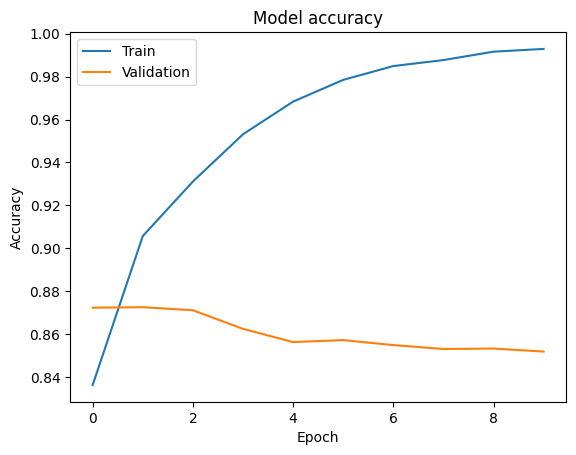

In [70]:
import matplotlib.pyplot as plt
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

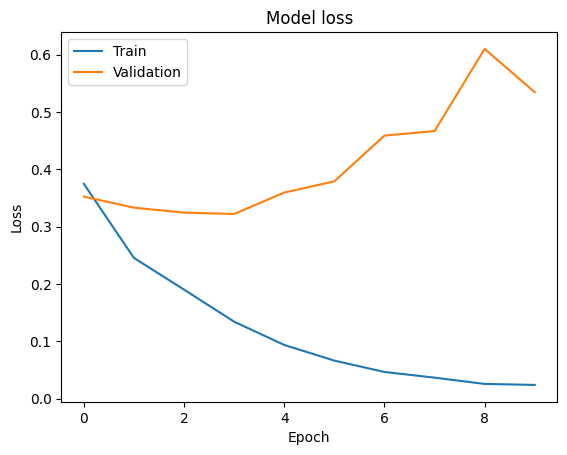

In [71]:
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Predction

In [72]:
bilstm_pred = model_bilstm.predict(X_test)

310/310 [==============================] - 8s 20ms/step


In [73]:
bilstm_pred = (bilstm_pred > 0.5).astype('int')

In [74]:
print("Accuracy Score is :",accuracy_score(bilstm_pred,y_test)*100,'%')

Accuracy Score is : 85.18705253604921 %


In [75]:
sentiment_labels = {0: 'negative', 1: 'positive'}

bilstm_sentiments = [[sentiment_labels[val[0]]] for val in bilstm_pred]
bilstm_sentiments[0:20]

[['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive']]